# Benchmarking NumPy, ndarray, and RMatrix

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [22]:
def visualize_results(operation: str, results: list[tuple[str, dict]]):
    """
    Visualize the results of the benchmark tests.
    """
    for label, result in results:
        sns.lineplot(x=result[operation]['sizes'], y=result[operation]['times'], label=label)

    plt.xlabel('Matrix Size (n x n)')
    plt.ylabel('Time (seconds)')
    plt.title(f'Performance Comparison: {operation}')

    plt.legend()
    plt.show()

In [23]:
def load_benchmark_results(filename: str) -> dict:
    """
    Load the benchmark results from a json file
    """
    benchmark_results = None
    with open(filename, 'r') as f:
        benchmark_results = json.load(f)
    return benchmark_results

In [24]:
# Loading benchmark results

numpy_results = load_benchmark_results('./benchmark_results/numpy_matrix_results.json')
ndarray_results = load_benchmark_results('./benchmark_results/ndarray_matrix_results.json')
basic_matrix_results = load_benchmark_results('./benchmark_results/basic_matrix_results.json')
one_d_vec_matrix_results = load_benchmark_results('./benchmark_results/one_d_vec_matrix_results.json')
blocked_matrix_results = load_benchmark_results('./benchmark_results/blocked_matrix_results.json')
transposed_view_matrix_results = load_benchmark_results('./benchmark_results/transposed_view_matrix_results.json')
blas_matrix_results = load_benchmark_results('./benchmark_results/blas_matrix_results.json')

results = [
    ('Numpy', numpy_results),
    ('Ndarray', ndarray_results),
    ('Basic Matrix', basic_matrix_results),
    ('OneD Vec Matrix', one_d_vec_matrix_results),
    ('Blocked Matrix', blocked_matrix_results),
    ('Transposed View Matrix', transposed_view_matrix_results),
    ('Blas Matrix', blas_matrix_results)
]

## Addition

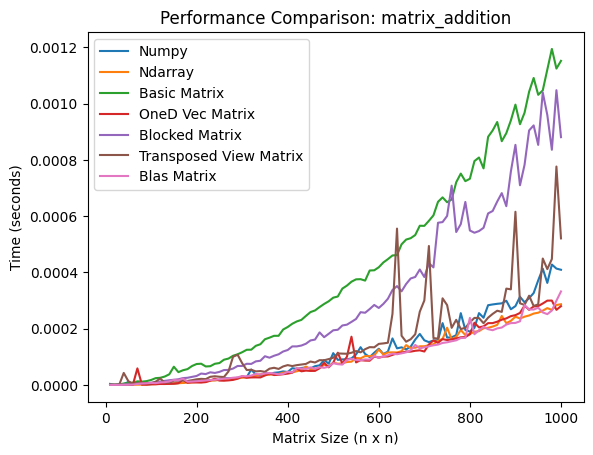

In [25]:
visualize_results('matrix_addition', results)

## Subtraction

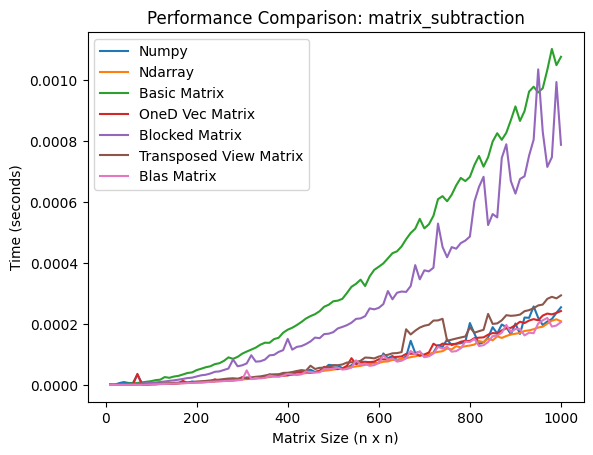

In [26]:
visualize_results('matrix_subtraction', results)

## Matrix Multiplication

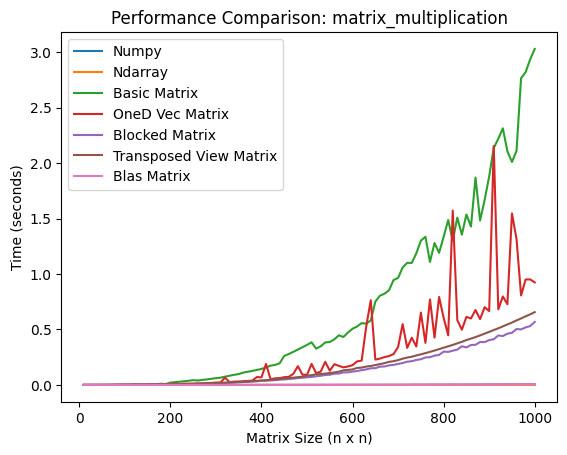

In [27]:
visualize_results('matrix_multiplication', results)

## Scalar Multiplication

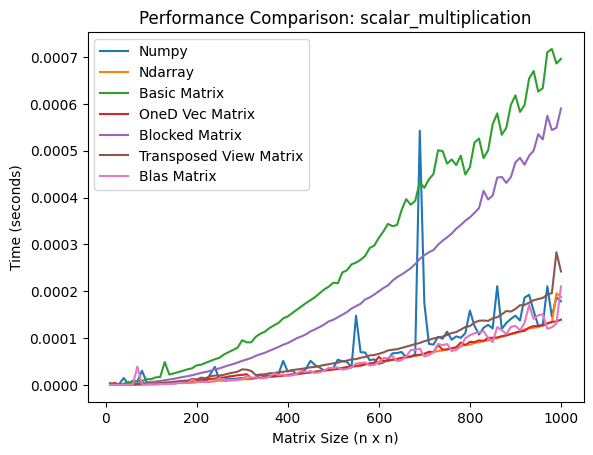

In [28]:
visualize_results('scalar_multiplication', results)